## PART 01: TELCO CUSTOMER CHURN ANALYSIS

#### Author: GREJELL B. SEGURA
#### Date: August 04, 2020

##### Dataset Overview: The data contains information on customers at a mid-sized telecom company. 

Objective: Predict customer churn using any machine learning framework (language / statistical model / library) of your choice. Determine what should be the evaluation metrics and optimize your model accordingly.  

## Contents

* [1.  Importing all libraries and data](#import-library-data)
    * [1.1.  Loading the data and quick look at dimensions](#load-data)
    
* [2. Exploratory Data Analysis (EDA)](#explore-data)
    * [2.1.  Identify Features](#column-names)
    * [2.2.  Identify Data Types](#data-types)
    * [2.3.  Data Munging - Imputing Missing Values](#imputation)
    
* [3.  Graphs and visualizations](#data-visualization)
    * [3.1.  Churns Bar Plot](#churns-plot)
    * [3.2.  Categorical Feature Bar Plots](#categorical-barplot)
        * [3.2.1  Senior Citizen Bar Plot](#senior-barplot)
        * [3.2.2  Gender Bar Plot](#gender-barplot)
        * [3.2.3  Partner Bar Plot](#partner-barplot)
        * [3.2.4  Dependents Bar Plot](#dependent-barplot)
        * [3.2.5  PhoneService Bar Plot](#phoneservice-barplot)
        * [3.2.6  MultipleLines Bar Plot](#MultipleLines-barplot)
        * [3.2.7  InternetService Bar Plot](#InternetService-barplot)
        * [3.2.8  OnlineSecurity Bar Plot](#OnlineSecurity-barplot)        
        * [3.2.9  OnlineBackup Bar Plot](#OnlineBackup-barplot)
        * [3.2.10  DeviceProtection Bar Plot](#DeviceProtection-barplot)        
        * [3.2.11  TechSupport Bar Plot](#TechSupport-barplot)
        * [3.2.12  StreamingTV Bar Plot](#StreamingTV-barplot)
        * [3.2.13  StreamingMovies Bar Plot](#StreamingMovies-barplot)
        * [3.2.14  PaperlessBilling Bar Plot](#PaperlessBilling-barplot)
        * [3.2.15  PaymentMethod Bar Plot](#PaymentMethod-barplot)
        * [3.2.16  Contract Bar Plot](#Contract-barplot)
    * [3.3.  Numerical Features Plot](#numerical-plot)
        * [3.2.1  TotalCharges Density Plot](#total-denseplot)
        * [3.2.2  Tenure Density Plot](#tenure-denseplot)
        * [3.2.3  MonthlyCharges Density Plot](#MonthlyCharges-denseplot)         
        * [3.2.4  Tenure vs. Monthly Charges Pair Plot](#tenure-monthly-pairplot)        
        * [3.2.5  Tenure vs. Total Charges Pair Plot](#tenure-total-pairplot)
        * [3.2.6  Monthly Charges vs. Total Charges Pair Plot](#monthly-total-pairplot)        
        * [3.2.7  Numerical Features Relationship](#numerical-relationship)
        
* [4. Statistical Analysis](#stat-analysis)
    * [4.1.  Chi-Square Test for Independence - Categorical Features](#chi-square)
    * [4.2.  Analysis of Variance (ANOVA) Test for Difference - Numerical Features](#anova-test)

* [5.  Data Preprocessing](#data-preprocessing)
    * [5.1.  One-Hot-Coding](#one-hot)
    
* [6. Train-Test Split Data](#split-data)
    * [6.1.  Saving Clean Data](#saving-clean)

<a id="import-library-data"></a>
# 1.  Importing all libraries and data

In [1]:
import pandas as pd
import numpy as np
import os
from datetime import datetime
import math
import time
import random

# VISUALIZATION
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

# PREPROCESSING
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

# STATISTICAL TESTS
from scipy.stats import chi2_contingency
from scipy.stats import chi2
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

In order to have a reproducible analysis, we need to set a random seed. It is useful to reproduce the data given by a pseudo-random number generator.

In [2]:
random.seed(23)

We also need to set our working directory.

In [3]:
os.chdir(r'/home/grejell/Projects/arab-bank-test-churn-analysis')

Loading the data and taking a quick look at the data dimensions.

<a id="load-data"></a>
## 1.1 Loading the data and quick look at dimensions

In [4]:
data = pd.read_csv('./data/Telco_Customer_Churn.csv')
print('The data has {} rows and {} columns.'.format(data.shape[0], data.shape[1]))

The data has 7043 rows and 21 columns.


Let us a quick look at the first 5 rows.

In [5]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Looking at the table above, we can identify that the target variable is "Churn".

<a id="explore-data"></a>
# 2. Exploratory Data Analysis (EDA)

<a id="column-names"></a>
## 2.1 Identify features

In [6]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<a id="data-types"></a>
## 2.2 Identify Data Types

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
data['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

The features tenure, SeniorCitizen, and MonthlyCharges data type were identified to be numerical.  
SeniorCitizen is a binary feature which means it has entries of only either 1 or 0.  

In [9]:
data['SeniorCitizen'] = data['SeniorCitizen'].astype(str)

<a id="imputation"></a>
## 2.3 Data Munging - Imputing Missing Values

By observing the previous table, we can also see that TotalCharges should also be numerical but it is identified as object in the info() function.  
We need to deal with this and convert the feature to numerical before proceeding.

##### First, we need to search for any character that is not a number or a decimal(.).

In [10]:
char_not_num = data[['TotalCharges']][~data['TotalCharges'].str.contains('[1-9.]')]
char_not_num

,TotalCharges
488,
753,
936,
1082,
1340,
3331,
3826,
4380,
5218,
6670,


In [11]:
print('There are {} rows that were found to have a special character.'.format(len(char_not_num)))

There are 11 rows that were found to have a special character.


The special character is blank which is considered a missing value.  
The 11 rows are only around 0.156% of the data. This is very small so we can remove it in our data.

In [12]:
data['TotalCharges'] = data['TotalCharges'].replace(" ",np.nan).astype(float)
data = data[pd.notnull(data['TotalCharges'])].reset_index().drop('index', axis=1)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [14]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are now NO missing values.  
We can now have a quick summary of all features.  
We will start with the numerical features.

In [15]:
data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


Based on count, all the numerical feature is filled and has no missing value.

<a id="graphs"></a>
# 3. Graphs and visualizations

Our main focus for visualizing is the relationship of the features between the Churn feature.  
We will therefore visualize based on this.  
Let us first look on the Churns.

<a id="churns-plot"></a>
## 3.1 Churns Bar Plot

Text(0, 0.5, 'Count')

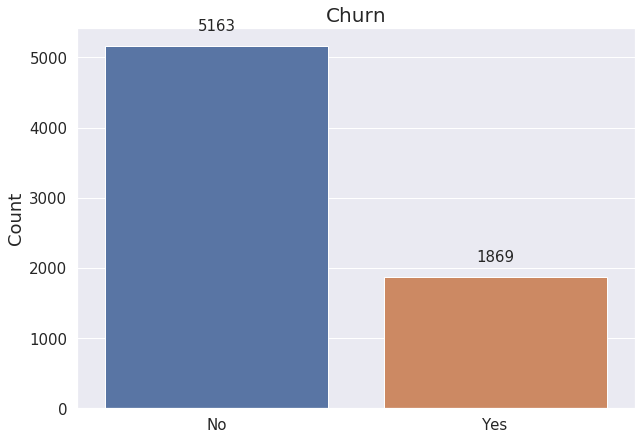

In [74]:
# create a bar plot based on frequency

plt.figure()
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
sns.set(rc={'figure.figsize':(10,7)})
cplot = sns.countplot(x="Churn", data=data)
for p in cplot.patches:
         cplot.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
             ha='center', va='center', fontsize=15, xytext=(0, 20),
             textcoords='offset points')
cplot.axes.set_title("Churn",fontsize=20)
cplot.set_xlabel("", fontsize=18)
cplot.set_ylabel("Count", fontsize=18)

Clearly, the number of churns (YES) is lesser than the non-churns (NO) by a difference of 3,294.  
YES is 73.4% while NO is 26.6% of the data.  
Let us now look at the relationship of categorical features against the number of churns.  
We will first create a visualization function that will show the proportion of the categories that are churned or not.

<a id="categorical-barplot"></a>
## 3.2 Categorical Feature Bar Plots

In [17]:
# this function creates a barplot given the data and the categorical feature against the Churns
def plot_categorical(data, feature, rotate=0, y_axis="percentage of customers", title=None):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=rotate)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)

    graph_data = data.groupby(feature)["Churn"].value_counts().to_frame()
    graph_data = graph_data.rename({"Churn": y_axis}, axis=1).reset_index()
    graph_data[y_axis] = graph_data[y_axis]/len(data)
    bar = sns.barplot(x=feature, y= y_axis, hue='Churn', data=graph_data)
#     bar.set_xticklabels(['{:,.0%}'.format(x) for x in bar.get_xticks()])
    bar.set_yticklabels(['{:,.0%}'.format(x) for x in bar.get_yticks()])
    
    for p in bar.patches:
             bar.annotate("%.2f" % (p.get_height()*100), (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=15, xytext=(0, 20),
                 textcoords='offset points')

    bar.axes.set_title(title,fontsize=20)
    bar.set_xlabel("")
    bar.set_ylabel(y_axis, fontsize=18)
    bar.plot()
    plt.savefig('bar.pdf')

In [18]:
# create a table showing values per churn

def show_crosstab(data, feature):
    orange = sns.light_palette("orange", as_cmap=True)
    tab = pd.crosstab(data[feature],data['Churn'], margins=True).style.set_table_attributes('style="font-size: 15px"')
    return tab

In [19]:
excluded_features = ['customerID', 'tenure', 'MonthlyCharges', 'TotalCharges']
cat_features = data.drop(excluded_features, axis=1)
cat_features.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

<a id="senior-barplot"></a>
### 3.2.1 Senior Citizen Bar Plot

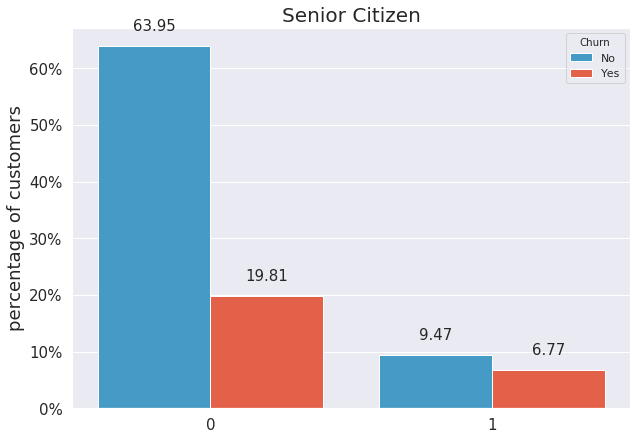

In [20]:
plot_categorical(data=data, feature='SeniorCitizen', title='Senior Citizen')

In [21]:
show_crosstab(data, 'SeniorCitizen')

Churn,No,Yes,All
SeniorCitizen,,,
0,4497,1393,5890
1,666,476,1142
All,5163,1869,7032


There are more non-Senior Citizen accounts but there is a large portion of churns with those who are Senior Citizens.  
83.76% non-senior citizens against 16.24% senior citizens.  
Bigger proportion of senior citizens are unsubscribed compared to non-senior citizens. 

<a id="gender-barplot"></a>
### 3.2.2 Gender Bar Plot

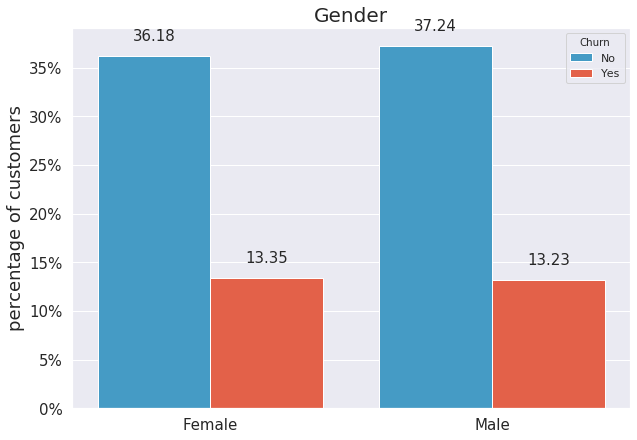

In [22]:
plot_categorical(data=cat_features, feature='gender', title='Gender')

In [23]:
show_crosstab(data, 'gender')

Churn,No,Yes,All
gender,,,
Female,2544,939,3483
Male,2619,930,3549
All,5163,1869,7032


The proportion of male and female are almost the same.  
The difference is barely noticeable.

<a id="partner-barplot"></a>
### 3.2.3 Partner Bar Plot

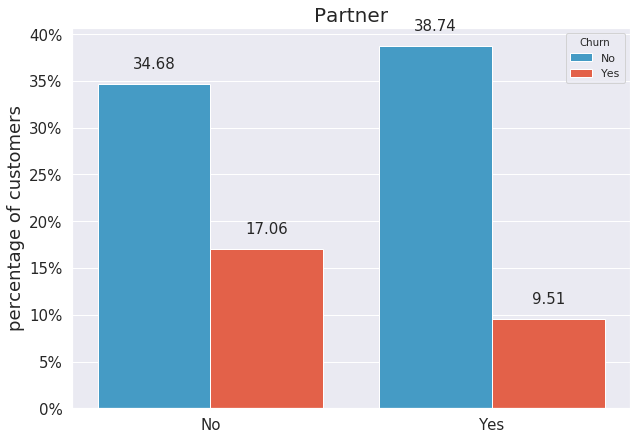

In [24]:
plot_categorical(data=cat_features, feature='Partner', title='Partner')

In [25]:
show_crosstab(data, 'Partner')

Churn,No,Yes,All
Partner,,,
No,2439,1200,3639
Yes,2724,669,3393
All,5163,1869,7032


There are more non-Senior Citizen accounts but there is a large portion of churns with those who are Senior Citizens.  
Bigger proportion of senior citizens are unsubscribed compared to non-senior citizens. 

<a id="dependent-barplot"></a>
### 3.2.4 Dependents Bar Plot

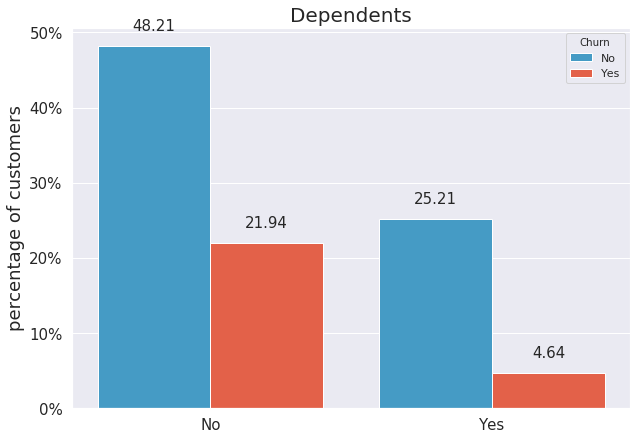

In [26]:
plot_categorical(data=cat_features, feature='Dependents', title='Dependents')

In [27]:
show_crosstab(data, 'Dependents')

Churn,No,Yes,All
Dependents,,,
No,3390,1543,4933
Yes,1773,326,2099
All,5163,1869,7032


Those who do not have dependents are 2.5 times more than those who have.  
In addition, there is higher proportion of unsubscribers with those who do not have dependents compared to those who have. 

<a id="phoneservice-barplot"></a>
### 3.2.5 PhoneService Bar Plot

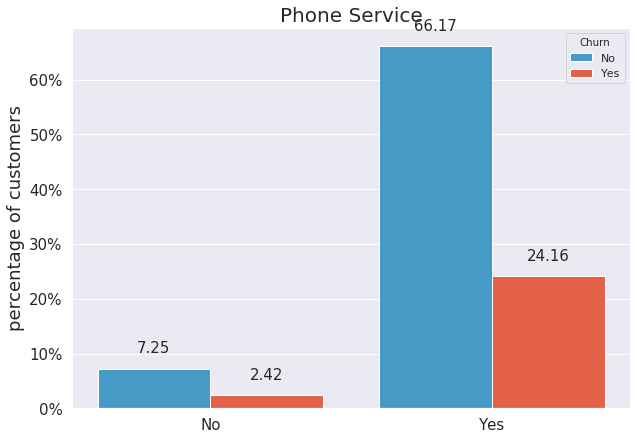

In [28]:
plot_categorical(data=cat_features, feature='PhoneService', title='Phone Service')

In [29]:
show_crosstab(data, 'PhoneService')

Churn,No,Yes,All
PhoneService,,,
No,510,170,680
Yes,4653,1699,6352
All,5163,1869,7032


Most of the data has phone service. The proportion of the subsribers vs. unsubscribers between the group however is visually indifferentiable.

<a id="MultipleLines-barplot"></a>
### 3.2.6 MultipleLines Bar Plot

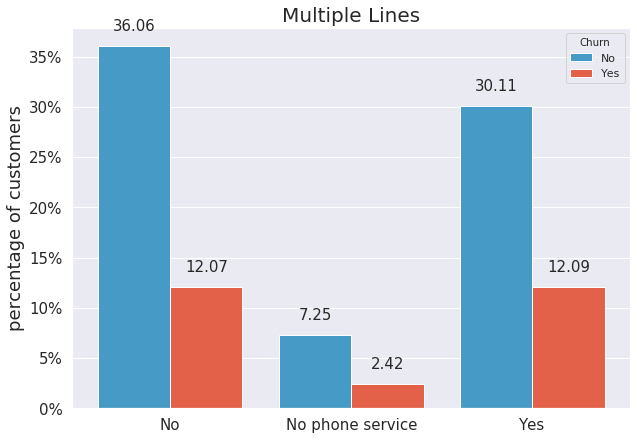

In [30]:
plot_categorical(data=cat_features, feature='MultipleLines', title='Multiple Lines')

In [31]:
show_crosstab(data, 'MultipleLines')

Churn,No,Yes,All
MultipleLines,,,
No,2536,849,3385
No phone service,510,170,680
Yes,2117,850,2967
All,5163,1869,7032


In proportion, there more unsubscribers with those with multiple lines.

<a id="InternetService-barplot"></a>
### 3.2.7 InternetService Bar Plot

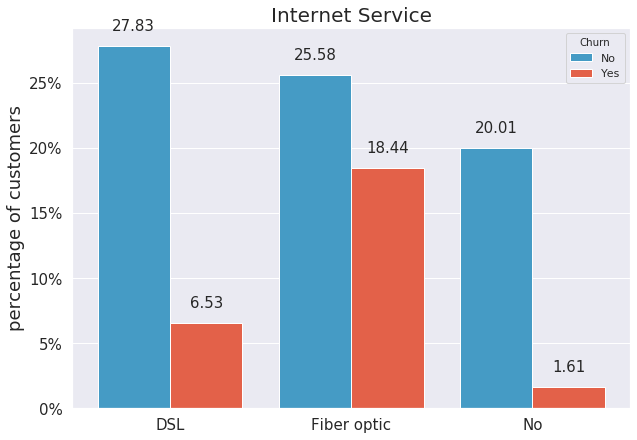

In [32]:
plot_categorical(data=cat_features, feature='InternetService', title='Internet Service')

In [33]:
show_crosstab(data, 'InternetService')

Churn,No,Yes,All
InternetService,,,
DSL,1957,459,2416
Fiber optic,1799,1297,3096
No,1407,113,1520
All,5163,1869,7032


A large proportion of unsubscribers can be seen with those who have fiber optics in their internet service.  

<a id="OnlineSecurity-barplot"></a>
### 3.2.8 OnlineSecurity Bar Plot

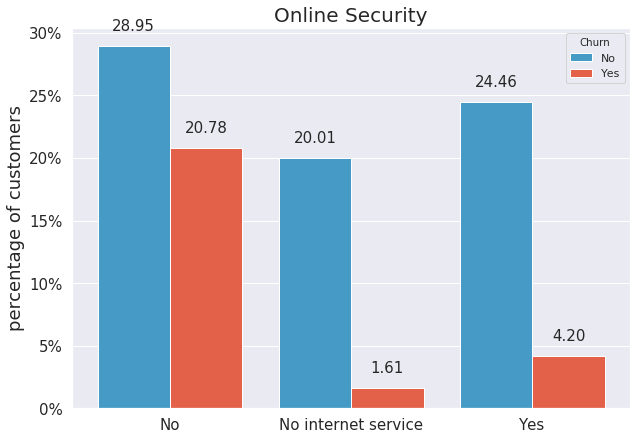

In [34]:
plot_categorical(data=cat_features, feature='OnlineSecurity', title='Online Security')

In [35]:
show_crosstab(data, 'OnlineSecurity')

Churn,No,Yes,All
OnlineSecurity,,,
No,2036,1461,3497
No internet service,1407,113,1520
Yes,1720,295,2015
All,5163,1869,7032


A large proportion of unsubscribers can be seen with those who have NO online security in their system.  

<a id="OnlineBackup-barplot"></a>
### 3.2.9 OnlineBackup Bar Plot

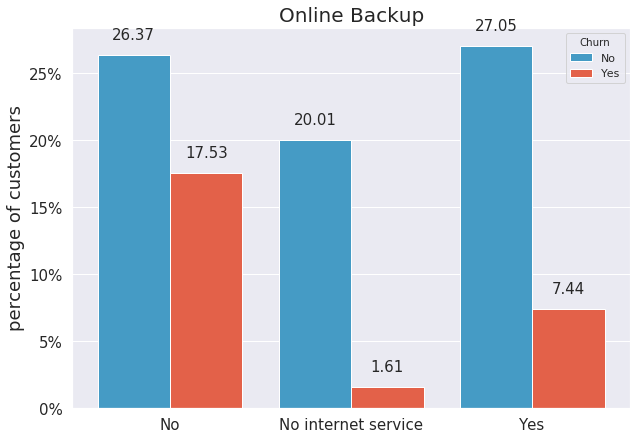

In [36]:
plot_categorical(data=cat_features, feature='OnlineBackup', title='Online Backup')

In [37]:
show_crosstab(data, 'OnlineBackup')

Churn,No,Yes,All
OnlineBackup,,,
No,1854,1233,3087
No internet service,1407,113,1520
Yes,1902,523,2425
All,5163,1869,7032


It follows that a large proportion of unsubscribers can also be seen with those who have NO online backup in their system.  

<a id="DeviceProtection-barplot"></a>
### 3.2.10 DeviceProtection Bar Plot

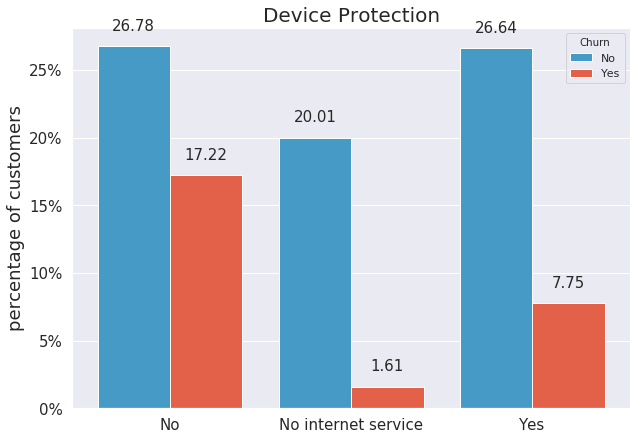

In [38]:
plot_categorical(data=cat_features, feature='DeviceProtection', title='Device Protection')

In [39]:
show_crosstab(data, 'DeviceProtection')

Churn,No,Yes,All
DeviceProtection,,,
No,1883,1211,3094
No internet service,1407,113,1520
Yes,1873,545,2418
All,5163,1869,7032


It is also not surprising that a large proportion of unsubscribers can be seen with those who have NO device protection in their system.  

<a id="TechSupport-barplot"></a>
### 3.2.11 TechSupport Bar Plot

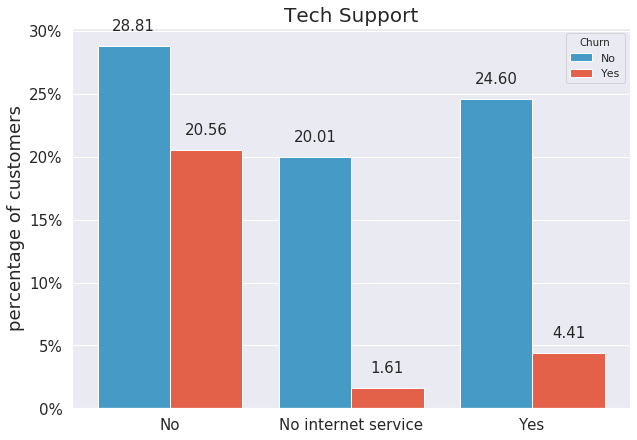

In [40]:
plot_categorical(data=cat_features, feature='TechSupport', title='Tech Support')

In [41]:
show_crosstab(data, 'TechSupport')

Churn,No,Yes,All
TechSupport,,,
No,2026,1446,3472
No internet service,1407,113,1520
Yes,1730,310,2040
All,5163,1869,7032


A large proportion of unsubscribers can be seen with those who have NO technical support.  

<a id="StreamingTV-barplot"></a>
### 3.2.12 StreamingTV Bar Plot

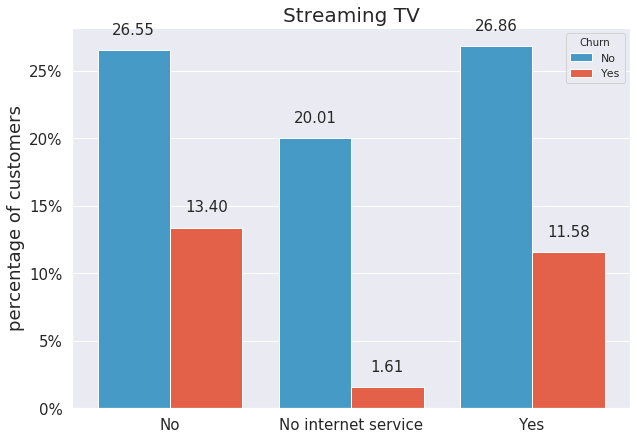

In [42]:
plot_categorical(data=cat_features, feature='StreamingTV', title='Streaming TV')

In [43]:
show_crosstab(data, 'StreamingTV')

Churn,No,Yes,All
StreamingTV,,,
No,1867,942,2809
No internet service,1407,113,1520
Yes,1889,814,2703
All,5163,1869,7032


Those who have no Streaming TV have more unsubscriptions.

<a id="StreamingMovies-barplot"></a>
### 3.2.13 StreamingMovies Bar Plot

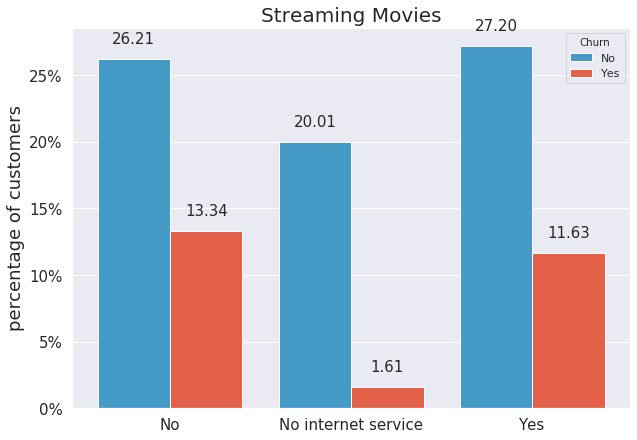

In [44]:
plot_categorical(data=cat_features, feature='StreamingMovies', title='Streaming Movies')

In [45]:
show_crosstab(data, 'StreamingMovies')

Churn,No,Yes,All
StreamingMovies,,,
No,1843,938,2781
No internet service,1407,113,1520
Yes,1913,818,2731
All,5163,1869,7032


It follows that those who have no Streaming Movies have more unsubscriptions.

<a id="Contract-barplot"></a>
### 3.2.14 Contract Bar Plot

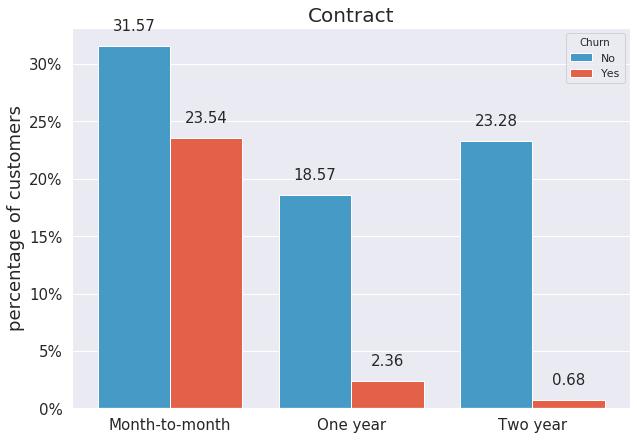

In [46]:
plot_categorical(data=cat_features, feature='Contract', title='Contract')

In [47]:
show_crosstab(data, 'Contract')

Churn,No,Yes,All
Contract,,,
Month-to-month,2220,1655,3875
One year,1306,166,1472
Two year,1637,48,1685
All,5163,1869,7032


More unsubscriptions occur with those who have a month-to-month contracts. May be because it is easier for them to terminate the contract on this kind of agreement.

<a id="PaperlessBilling-barplot"></a>
### 3.2.15 PaperlessBilling Bar Plot

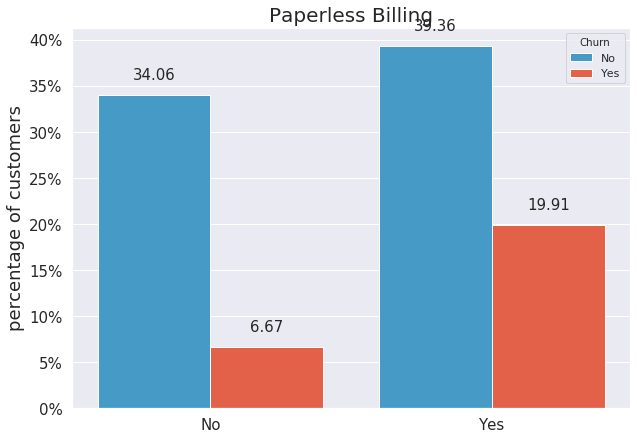

In [48]:
plot_categorical(data=cat_features, feature='PaperlessBilling', title='Paperless Billing')

In [49]:
show_crosstab(data, 'PaperlessBilling')

Churn,No,Yes,All
PaperlessBilling,,,
No,2395,469,2864
Yes,2768,1400,4168
All,5163,1869,7032


More unsubscription happen with those who use paperless bills.

<a id="PaymentMethod-barplot"></a>
### 3.2.16 PaymentMethod Bar Plot

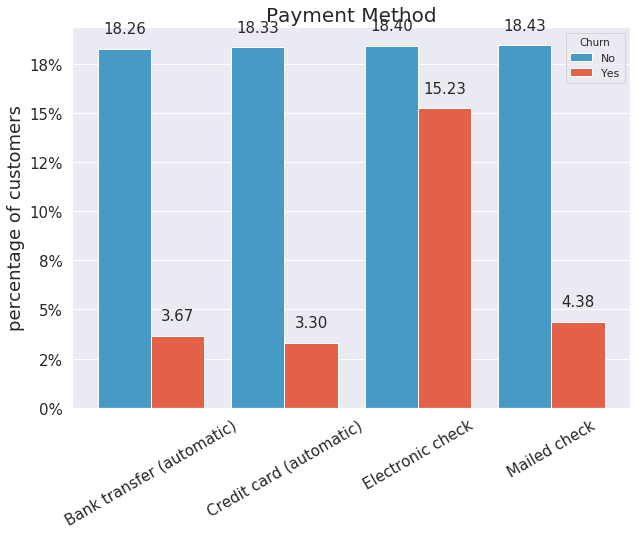

In [50]:
plot_categorical(data=cat_features, feature='PaymentMethod', rotate=30, title='Payment Method')

In [51]:
show_crosstab(data, 'PaymentMethod')

Churn,No,Yes,All
PaymentMethod,,,
Bank transfer (automatic),1284,258,1542
Credit card (automatic),1289,232,1521
Electronic check,1294,1071,2365
Mailed check,1296,308,1604
All,5163,1869,7032


A big proportion of unsubscription occur with those who use Electronic check as the payment method.

<a id="numerical-plot"></a>
## 3.3 Numerical Features Plot

Let us now look into the numerical features. 

In the same manner, we will also create a plotting function to show the relationship of the numerical features against the churns.

In [52]:
# create a density plot sshowing diference between churn groups
def plot_numerical(data, feature, title=None):
    plt.figure()
    plt.yticks(fontsize=15)
    plt.xticks(fontsize=15, rotation=0)
    sns.set(rc={'figure.figsize':(10,7)})
    five_thirty_eight = [
                        "#30a2da",
                        "#fc4f30",
                        "#e5ae38",
                        "#6d904f",
                        "#8b8b8b",
                        ]
    sns.set_palette(five_thirty_eight)
    plot = sns.distplot(data[feature][data['Churn']=='No'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1}, color='red')
    plot = sns.distplot(data[feature][data['Churn']=='Yes'], hist = False, kde = True,
                     kde_kws = {'shade': True, 'linewidth': 1})
    plot.axes.set_title(title,fontsize=20)
    plot.set_xlabel("")
    plot.set_ylabel('density', fontsize=18)
    plot.legend(labels=['No','Yes'], title='Churn')
    plot.plot()
    plt.savefig('bar.pdf')

<a id="total-denseplot"></a>
### 3.3.1 TotalCharges Density Plot

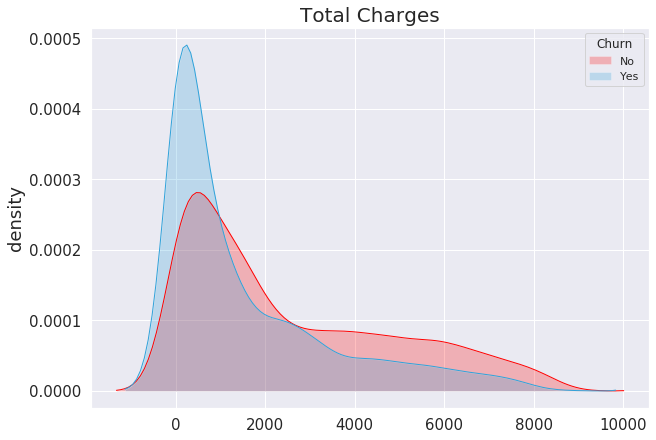

In [53]:
plot_numerical(data=data, feature='TotalCharges', title='Total Charges')

There are more unsubscribers when total charges are lower while there are more subscribers when total charges gets are higher. 

<a id="tenure-denseplot"></a>
### 3.3.2 Tenure Density Plot

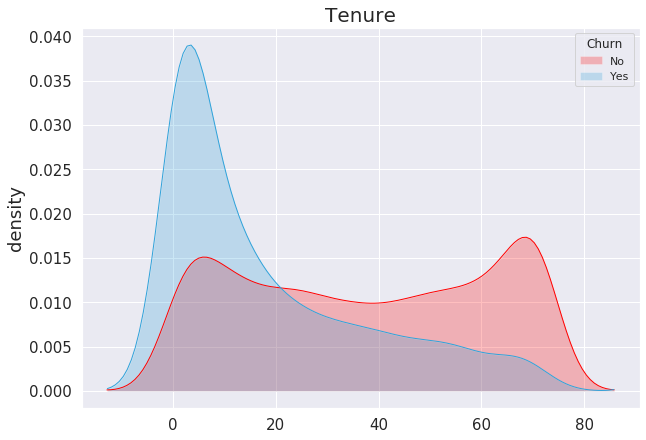

In [54]:
plot_numerical(data=data, feature='tenure', title='Tenure')

As the contract tenure gets longer, more subscribers stay. Meanwhile, many unsubscription happen during the early stage of tenure.

<a id="MonthlyCharges-denseplot"></a>
### 3.3.3 MonthlyCharges Density Plot

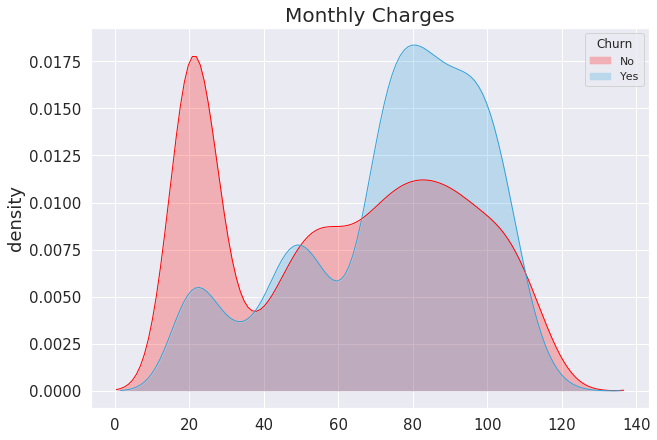

In [55]:
plot_numerical(data=data, feature='MonthlyCharges', title='Monthly Charges')

There are more subscribers staying when they have lower monthly charges. On the other hand, many unsubscription happens when the monthly charges is high.

<a id="tenure-monthly-pairplot"></a>
### 3.3.4 Tenure vs. Monthly Charges Pair Plot

In [56]:
# this function creates scatterplot with churn groups as hue 
def plot_pair(data, x_feature, y_feature, title=None):
    sns.set(rc={'figure.figsize':(12,8.27)})
    sns.set(font_scale = 1.5)
    scatter = sns.scatterplot(x=x_feature, y=y_feature, data=data, hue='Churn', s=100, alpha=0.7)
    scatter.axes.set_title(title,fontsize=20)
    scatter.plot()

# create data for the scatter plot
scatter_data = data[['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]


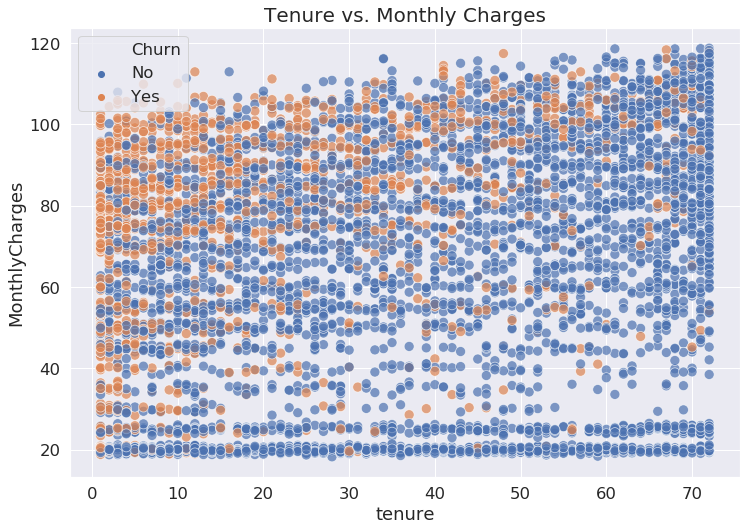

In [57]:
plot_pair(scatter_data, 'tenure', 'MonthlyCharges', title='Tenure vs. Monthly Charges')

The unsubscriptions are concentrated on the higher MonthlyCharges and lower tenure

<a id="tenure-total-pairplot"></a>
### 3.3.5 Tenure vs. Total Charges Pair Plot

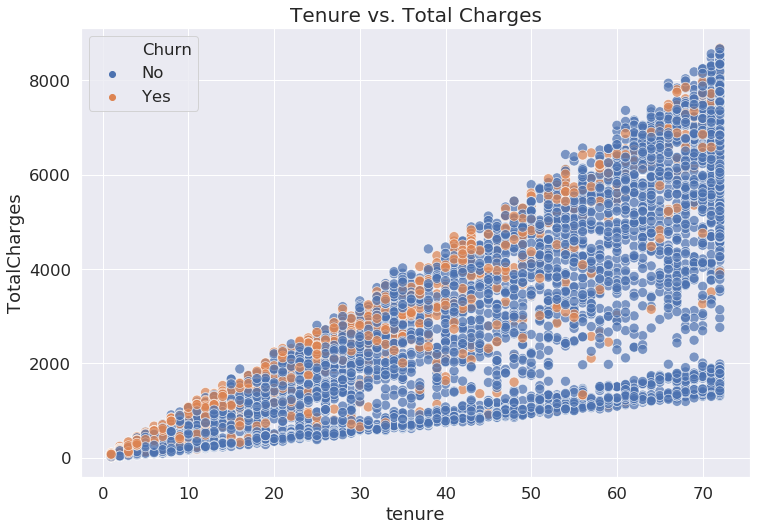

In [58]:
plot_pair(scatter_data, 'tenure', 'TotalCharges', title='Tenure vs. Total Charges')

The unsubscriptions are concentrated on the higher end of TotalCharges in every tenure period.

<a id="monthly-total-pairplot"></a>
### 3.3.6 Monthly Charges vs. Total Charges Pair Plot

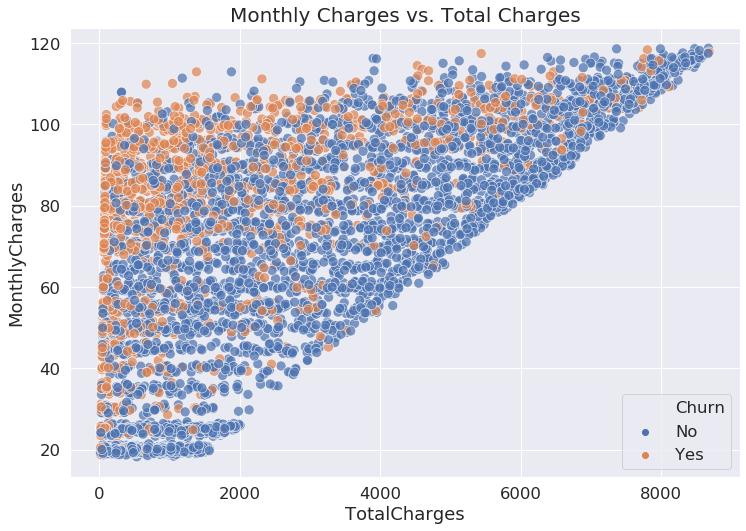

In [59]:
plot_pair(scatter_data, 'TotalCharges', 'MonthlyCharges', title='Monthly Charges vs. Total Charges')

The unsubscription is concentrated on the higher MonthlyCharges and lower total charges.

<a id="numerical-relationship"></a>
### 3.3.7 Numerical Features Relationship

[]

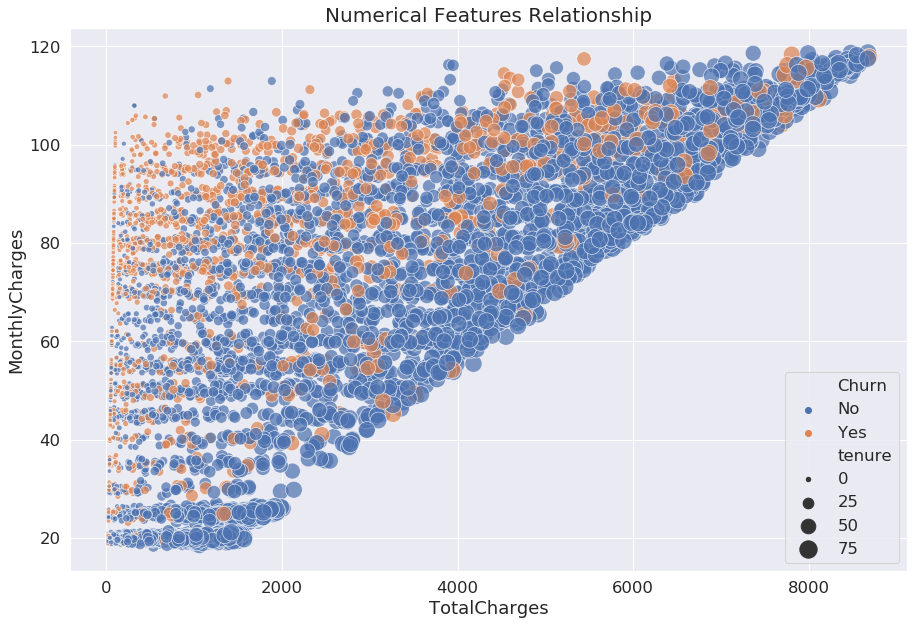

In [60]:
sns.set(rc={'figure.figsize':(15,10)})
sns.set(font_scale = 1.5)
scatter = sns.scatterplot(x='TotalCharges', y='MonthlyCharges', data=data, hue='Churn', size='tenure', sizes=(20, 300), alpha=0.7)
scatter.axes.set_title('Numerical Features Relationship',fontsize=20)
scatter.plot()

More unsubscribers has lower bubble size which means that more unsubscriptions are likely to happen when they have high monthly charges with lower total charges at an early stage of tenure.

<a id="stat-analysis"></a>
# 4. Statistical Analysis

<a id="chi-square"></a>
## 4.1 Chi-Square Test of Independence - Categorical Features

The goal of this analysis is to investigate the relationship of the categorical features to the dependent/target variable Churn=YES.  
The test will determine if there is significant difference in the proportion of Churns between the groups in the categorical variable.   
  
  
The null hypothesis assumes that theres is no association between the categorical feature and the feature Churn=YES.  
The alternative hypothesis that there is an association between the two variables.  
  
  
The alpha statistics is set to 0.05.  
If the p-value is lesser than alpha then we will reject the null hypothesis and accept the alternative that the proportions of Churn is dependent with the group in the categorical variable.

We first create a list of all categorical variable to be tested against Churn.

In [61]:
features = pd.Series(cat_features.drop(['Churn'], axis=1).columns).append(pd.Series(['SeniorCitizen']))

In [62]:

# this function creates will automaticall generate the decision for the chi square test
def chi_square_test(data, feature):
    df = pd.crosstab(data[feature],data['Churn'])
    stat, p, dof, expected = chi2_contingency(df)
    print('='*60)
    print('Chi-Square Test for {}'.format(feature))
    print('='*60)
    print('degrees of freedom = %d' % dof)
    print('-'*60)
    # interpret test-statistic
    prob = 0.95
    critical = chi2.ppf(prob, dof)
    print('Results:')
    print(' ')
    print('probability = %.3f, critical = %.3f, stat = %.3f' % (prob, critical, stat))
    print('-'*60)
    print('Decision based on Chi-Square Statistics:')
    print(' ')
    if abs(stat) >= critical:
        print('The Churns are dependent on {} : (reject H0)'.format(feature))
    else:
        print('The Churns are independent on {} : (fail to reject H0)'.format(feature))
    # interpret p-value
    alpha = 1.0 - prob
    print('-'*60)
    print('Decision based on p-value:')
    print(' ')
    print('alpha = %.2f, p = %.3f' % (alpha, p))
    if p <= alpha:
        print('The Churns are dependent on {} : (reject H0)'.format(feature))
    else:
        print('The Churns are independent on {} : (fail to reject H0)'.format(feature))
    print('_'*60)
    print(' '*60)
    print('_'*60)
    print('_'*60)

In [63]:
for feature in features:
    chi_square_test(data, feature)

Chi-Square Test for gender
degrees of freedom = 1
------------------------------------------------------------
Results:
 
probability = 0.950, critical = 3.841, stat = 0.475
------------------------------------------------------------
Decision based on Chi-Square Statistics:
 
The Churns are independent on gender : (fail to reject H0)
------------------------------------------------------------
Decision based on p-value:
 
alpha = 0.05, p = 0.490
The Churns are independent on gender : (fail to reject H0)
____________________________________________________________
                                                            
____________________________________________________________
____________________________________________________________
Chi-Square Test for SeniorCitizen
degrees of freedom = 1
------------------------------------------------------------
Results:
 
probability = 0.950, critical = 3.841, stat = 158.441
------------------------------------------------------------
De

| Decision | | | | | | | | | | | | | |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| <span style="font-weight:bold;">Dependent</span> | Partner | Dependents | MultipleLines | InternetService | OnlineSecurity | OnlineBackup | DeviceProtection |  TechSupport |  StreamingTV | StreamingMovies | Contract | PaperlessBilling | PaymentMethod | SeniorCitizen |
| <span style="font-weight:bold;">Independent</span> | Gender  | PhoneService  |

Churns are found to be dependent on all variables except for Gender and PhoneService.  

For the results that says Dependent, this would mean that some group in the given categorical variable will have significantly more subscribers than the other group.  
For example using the feature "Partner", there is significant (statistically) difference of number of subscribers between the group "Partner=YES" and "Partner=NO".  

<a id="anova-test"></a>
## 4.2 Analysis of Variance (ANOVA) Test for Difference - Numerical Features

This test will determine if there is significant difference between the means of Churn=YES and Churn=NO in numerical variables Tenure, Total Charges and Monthly Charges.  
  
  
The null hypothesis assumes that there no statistically significant difference in means between the Churn groups.  
The alternative assumes there is significant difference between the group. 

Each group were sample 0.05% to 
  
  
The alpha statistics is set to 0.05.  
If the p-value is lesser than alpha then we will reject the null hypothesis and accept the alternative that there is significant difference between the groups.


In [65]:
yes = data['MonthlyCharges'][data['Churn']=='Yes']
yes = yes.sample(round(len(yes)*0.05))
no = data['MonthlyCharges'][data['Churn']=='No']
no = no.sample(round(len(no)*0.05))
stats.f_oneway(yes, no)

F_onewayResult(statistic=15.693504903130604, pvalue=9.031947782218387e-05)

In [66]:
yes = data['TotalCharges'][data['Churn']=='Yes']
yes = yes.sample(round(len(yes)*0.05))
no = data['TotalCharges'][data['Churn']=='No']
no = no.sample(round(len(no)*0.05))
stats.f_oneway(yes, no)

F_onewayResult(statistic=21.384766969004616, pvalue=5.300204071879548e-06)

In [67]:
yes = data['tenure'][data['Churn']=='Yes']
yes = yes.sample(round(len(yes)*0.05))
no = data['tenure'][data['Churn']=='No']
no = no.sample(round(len(no)*0.05))
stats.f_oneway(yes, no)

F_onewayResult(statistic=34.50790413748355, pvalue=9.90464095265808e-09)

All the tests shows very small p-values which means there is difference in means between Churn=YES and Churn=No for the numerical variables.  
This means that the change in the value of the numerical variables has effect on whether it will stay subscribed or not.

<a id="data-preprocessing"></a>
# 5. Data Pre-processing

<a id="one-hot"></a>
## 5.1 One-Hot-Coding

Data pre-processing will involve converting the categorical variables into numerical. 

This is because most of the machine learning models only accepts numerical inputs. 

There are a number of ways/process to convert the categorical variables into numerical. 

One is label encoding, where each category will be assigned a certain number, i.e., for ['YES', 'NO', 'UNKNOWN', 'MAYBE'] will be converted to [1,2,3,4] respectively. 

Another is the one-hot-coding, which converts all categories into a binary [0,1]. 

We will use the one-hot-coding method for this analysis.

In [68]:
cats = cat_features.columns
customerID = data.customerID
cleanData = pd.get_dummies(data.drop(['customerID'],axis=1), prefix = cats)
cleanData = cleanData.drop('Churn_No', axis=1)

In [69]:
cleanData.head()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_0,SeniorCitizen_1,Partner_No,Partner_Yes,Dependents_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,1,0,1,0,0,1,1,...,1,0,0,0,1,0,0,1,0,0
1,34,56.95,1889.50,0,1,1,0,1,0,1,...,0,1,0,1,0,0,0,0,1,0
2,2,53.85,108.15,0,1,1,0,1,0,1,...,1,0,0,0,1,0,0,0,1,1
3,45,42.30,1840.75,0,1,1,0,1,0,1,...,0,1,0,1,0,1,0,0,0,0
4,2,70.70,151.65,1,0,1,0,1,0,1,...,1,0,0,0,1,0,0,1,0,1


The data now has 46 features including the target feature after the one-hot-coding process.

<a id="split-data"></a>
# 6. Train-Test Split Data

Let us split the data where 75% is for training and the remaining 25% is for testing.

In [70]:
# this function creates thesplits the data into 75/25 train/test proportion
def split_data(data):
    # change the target feature name to labels
    data = data.rename(columns={'Churn_Yes': 'labels'})
    dataX = data.drop(['labels'], axis = 1)
    dataY = data['labels']
    
    # Create train and test dataset
    X_train, x_test, Y_train, y_test = train_test_split(dataX, dataY, random_state = 0)
    return X_train, x_test, Y_train, y_test

X_train, x_test, Y_train, y_test = split_data(cleanData)

In [71]:
print('There are {} rows for training.'.format(len(X_train)))
print('There are {} rows for testing.'.format(len(x_test)))

There are 5274 rows for training.
There are 1758 rows for testing.


<a id="saving-clean"></a>
## 6.1 Save Data

We now save the cleaned up data to be used for model training.

In [72]:
cleanData.to_pickle('./data/cleanData.pkl')
X_train.to_pickle('./data/X_train.pkl')
x_test.to_pickle('./data/x_test.pkl')
Y_train.to_pickle('./data/Y_train.pkl')
y_test.to_pickle('./data/y_test.pkl')